<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [3]:
seaborn.__version__

'0.9.0'

In [4]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [5]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [7]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

### 1.1   Rango de Variables

#### 1.1.1 Rango de variables

<br> pf_identity_legal : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_parental_marriage : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_parental_divorce : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_parental : { x pertenece a Q | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_sex_male : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_sex_female : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_sex : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity_divorce : { x pertenece a N | 0 <= x <= 10}  Conjunto finito
<br> pf_identity : { x pertenece a R | 0 <= x <= 10}  Conjunto infinito no contable
<br> ef_score : { x pertenece a Q | 0 <= x <= 10}  Conjunto finito
<br> ef_rank :  { x pertenece a N | 0 <= x <= 162}  Conjunto finito
<br> hf_score : { x pertenece a R | 0 <= x <= 10}  Conjunto infinito no contable
<br> hf_rank : { x pertenece a N | 0 <= x <= 162}  Conjunto finito

In [8]:
variable_cols = []
variable_cols += [col for col in dataset.columns if 'pf_identity' in col]

variable_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

for x in dataset[variable_cols] : 
    max = dataset[x].max()
    min = dataset[x].min()
    rango = max - min
    print(x + ": Minimo = " + str(min))
    print(x + ": Maximo = " + str(max))
    print("Datos : " + str(dataset[x].unique()))
    print("------------")
    print("------------")

pf_identity_legal: Minimo = 0.0
pf_identity_legal: Maximo = 10.0
Datos : [ 0. nan 10.  7.]
------------
------------
pf_identity_parental_marriage: Minimo = 0.0
pf_identity_parental_marriage: Maximo = 10.0
Datos : [10.  0. nan  5.]
------------
------------
pf_identity_parental_divorce: Minimo = 0.0
pf_identity_parental_divorce: Maximo = 10.0
Datos : [10.  5.  0. nan]
------------
------------
pf_identity_parental: Minimo = 0.0
pf_identity_parental: Maximo = 10.0
Datos : [10.   2.5  0.   5.   7.5  nan]
------------
------------
pf_identity_sex_male: Minimo = 0.0
pf_identity_sex_male: Maximo = 10.0
Datos : [10.  0.  5. nan]
------------
------------
pf_identity_sex_female: Minimo = 0.0
pf_identity_sex_female: Maximo = 10.0
Datos : [10.  0.  5. nan]
------------
------------
pf_identity_sex: Minimo = 0.0
pf_identity_sex: Maximo = 10.0
Datos : [10.  0.  5. nan]
------------
------------
pf_identity_divorce: Minimo = 0.0
pf_identity_divorce: Maximo = 10.0
Datos : [ 5.  0. 10. nan]
--------

### 1.2   Media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe

#### 1.2.1 Media, mediana y desviación estándar de pf_identity en el mundo y Latinoamérica 

In [9]:
# Todo el Mundo
ds = dataset

compare_cols = ["hf_score","pf_identity"]

print("")
for x in ds[compare_cols]: 
    print("Todo el Mundo")
    print(str(ds[x].describe()) + "\n")

# Latin America & the Caribbean

ds_latin = ds[ds.region == "Latin America & the Caribbean"]
compare_cols = ["pf_identity", "hf_score"]

for y in ds_latin[compare_cols]:
    print("Latin America & the Caribbean")
    print(str(ds[y].describe()) + "\n")


Todo el Mundo
count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

Todo el Mundo
count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

Latin America & the Caribbean
count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

Latin America & the Caribbean
count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64



#### ¿Tiene sentido calcular la moda?

No tiene sentido calcular la moda, dado que los datos no son discretos, son variables continuas

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

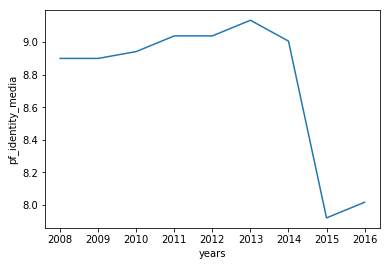

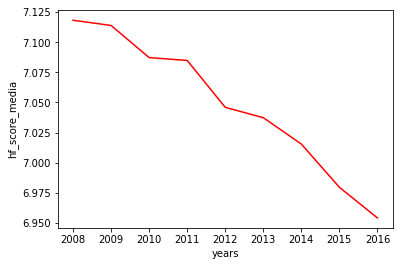

In [10]:
#america latina

dataset_imp_cols = dataset[important_cols]
latin_american=dataset_imp_cols[dataset_imp_cols.region == 'Latin America & the Caribbean']

years = list(latin_american.year.unique())
years.reverse()

pf_identity_med = []
hf_score_med = []

for y in years:
    pf_identity_med.append(
        latin_american[latin_american.year == y].pf_identity.mean() 
    )
    hf_score_med.append(
        latin_american[latin_american.year == y].hf_score.mean() 
    )

df1 = pandas.DataFrame(dict(years=years, pf_identity_media=pf_identity_med))
df2 = pandas.DataFrame(dict(years=years, hf_score_media=hf_score_med))


seaborn.lineplot(x='years', y='pf_identity_media', data=df1)
plt.figure()
seaborn.lineplot(x='years', y='hf_score_media', data=df2, color='red')

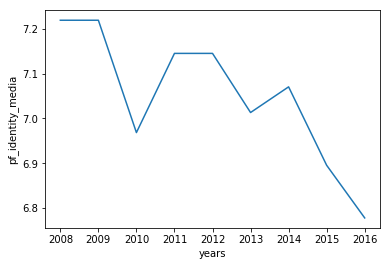

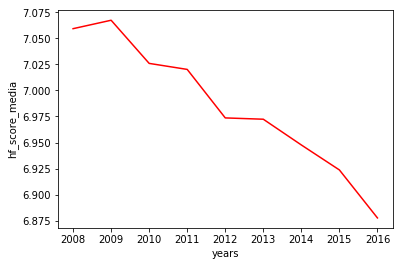

In [11]:
#resto del mundo menos america latina y caribe

dataset_imp_cols = dataset[important_cols]
latin_american=dataset_imp_cols[dataset_imp_cols.region != 'Latin America & the Caribbean']

years = list(latin_american.year.unique())
years.reverse()

pf_identity_med = []
hf_score_med = []

for y in years:
    pf_identity_med.append(
        latin_american[latin_american.year == y].pf_identity.mean() 
    )
    hf_score_med.append(
        latin_american[latin_american.year == y].hf_score.mean() 
    )

df1 = pandas.DataFrame(dict(years=years, pf_identity_media=pf_identity_med))
df2 = pandas.DataFrame(dict(years=years, hf_score_media=hf_score_med))


seaborn.lineplot(x='years', y='pf_identity_media', data=df1)
plt.figure()
seaborn.lineplot(x='years', y='hf_score_media', data=df2, color='red')

/root/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


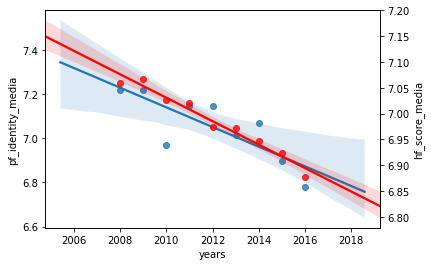

In [12]:
    fig, ax = plt.subplots()
    seaborn.regplot(x='years', y='pf_identity_media', data=df1, ax=ax)
    ax2 = ax.twinx()
    seaborn.regplot(x='years', y='hf_score_media', data=df2, ax=ax2, color='r')
    

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

### 3.1.1 histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe

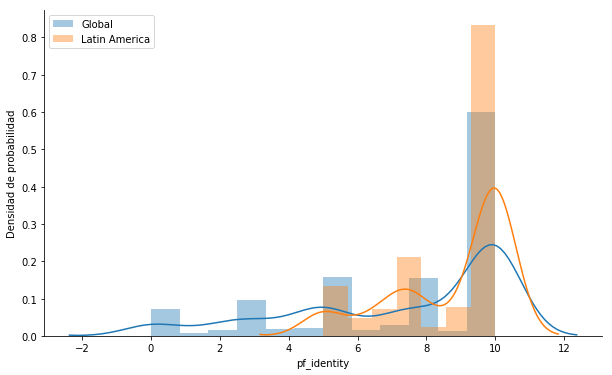

In [13]:

plt.figure(figsize=(10,6))
seaborn.distplot(ds['pf_identity'].dropna(), label='Global')
seaborn.distplot(ds[ds.region == "Latin America & the Caribbean"]['pf_identity'].dropna(), label='Latin America')
plt.ylabel('Densidad de probabilidad')
plt.legend()
seaborn.despine()

Analisis <br>
<ul>
    <li>America Latina tiene un indice (de probabilidad) más alto, en libertad de identidad comparado con el mundo</li>
    <li>El tipo de distribución es Normal con cola a la izquiera y no simetrica, para ambos casos (Mundo y America Latina)</li>
</ul>

##### 3.1.2 histograma de distribución de la variable hf_score en global, y en Latinoamérica y el caribe

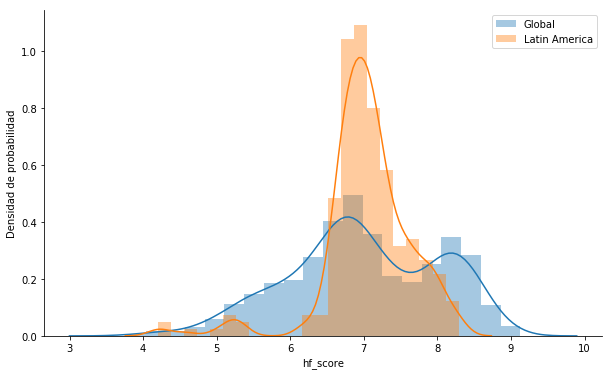

In [14]:

plt.figure(figsize=(10,6))
seaborn.distplot(ds['hf_score'].dropna(), label='Global')
seaborn.distplot(ds[ds.region == "Latin America & the Caribbean"]['hf_score'].dropna(), label='Latin America')
plt.ylabel('Densidad de probabilidad')
plt.legend()
seaborn.despine()

Analisis
<ul>
    <li>America Latina tiene un indice (de probabilidad) más alto, en libertades humanas (human freedom score) comparado con el mundo</li>
    <li>El tipo de distribución es Normal no simetrica, para ambos casos (Mundo y America Latina)</li>
</ul>

### 3.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior.  

pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

##### pf_ identity en el mundo y America Latina

In [15]:
stats.kstest(dataset['pf_identity'].dropna(), 'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

In [16]:
stats.kstest(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

##### hf_score en el mundo y America Latina

In [30]:
stats.kstest(dataset['hf_score'].dropna(), 'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

In [31]:
stats.kstest(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), 'norm')

KstestResult(statistic=0.9999866968877408, pvalue=0.0)

Analisis
<ul>
    <li>En ambos casos (pf_identity y hf_score) al optener pvalue = 0, no podemos afirmar que la distribución sea normal </li>
    <li>Dado que el test dice que la distribución no es normal, las distribuciones del punto 3.1.1 y 3.1.2 posiblemente no lo sean </li>
</ul>

### 3.3.1 Gráfico QQ de las distribuciones de pf_identity en el mundo

Primero sacamos los parametros de la media y desviación estándar (de pf_identity en el mundo), para luego hacer una muestra aleatoria que si tenga una distribución normal que vamos a usar como comparador en el gráfico QQ

In [17]:
from scipy import stats

# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(dataset['pf_identity'].dropna())
loc, scale

(7.334179970968069, 3.1583260555019637)

Ahora podemos crear una nueva distribución normal con estos parámetros

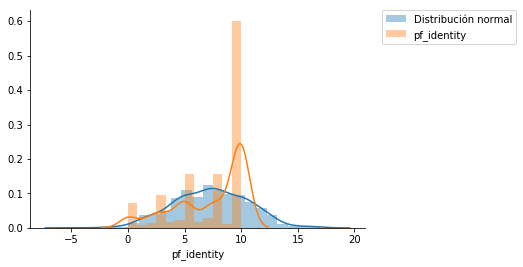

In [18]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset['pf_identity'].dropna(), label='pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

In [19]:
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['pf_identity'].dropna())), percs)

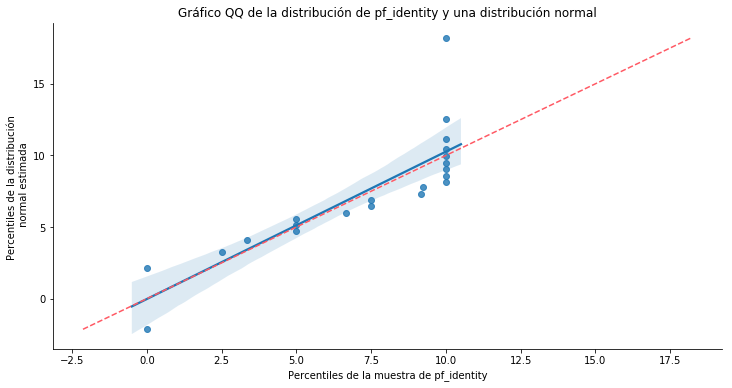

In [20]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra de pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#FF5964", ls="--")

seaborn.despine()

### 3.3.2 Gráfico QQ de las distribuciones de pf_identity en America Latina y el Caribe

Primero sacamos los parametros de la media y desviación estándar (de pf_identity en el mundo), para luego hacer una muestra aleatoria que si tenga una distribución normal que vamos a usar como comparador en el gráfico QQ

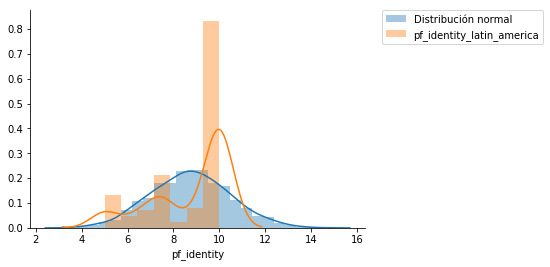

In [53]:
from scipy import stats

# Definimos la variable para el dataset que vamos a utilizar
dataset_pf_identity_latin_america = dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna()

# Estimamos los parámetros muestrales (la media y desviación estándar)
loc, scale = stats.norm.fit(dataset_pf_identity_latin_america)

# Creamos una distribución normal
norm_dist = stats.norm(loc, scale)

# Generamos una muestra
sample = norm_dist.rvs(1000)

# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset_pf_identity_latin_america, label='pf_identity_latin_america')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

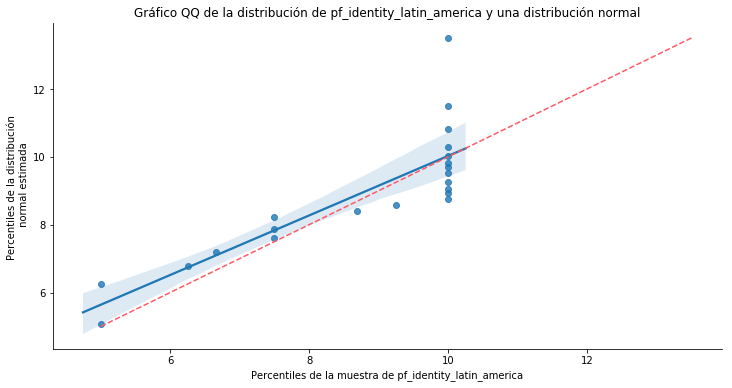

In [55]:
# Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
percs = numpy.linspace(0,100,21)

qn_sample = numpy.percentile(dataset_pf_identity_latin_america, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset_pf_identity_latin_america)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)

plt.xlabel('Percentiles de la muestra de pf_identity_latin_america')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity_latin_america y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#FF5964", ls="--")

seaborn.despine()

### 3.3.3 Gráfico QQ de las distribuciones de hf_score en América Latina

Primero sacamos los parametros de la media y desviación estándar (de pf_identity en el mundo), para luego hacer una muestra aleatoria que si tenga una distribución normal que vamos a usar como comparador en el gráfico QQ

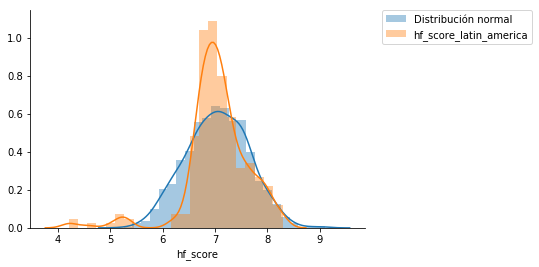

In [50]:
from scipy import stats

# Definimos la variable para el dataset que vamos a utilizar
dataset_hf_score_latin_america = dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()

# Estimamos los parámetros muestrales (la media y desviación estándar)
loc, scale = stats.norm.fit(dataset_hf_score_latin_america)

# Creamos una distribución normal
norm_dist = stats.norm(loc, scale)

# Generamos una muestra
sample = norm_dist.rvs(1000)

# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset_hf_score_latin_america, label='hf_score_latin_america')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

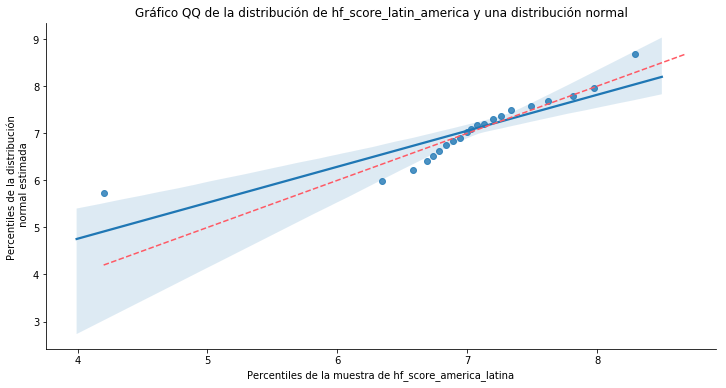

In [48]:
# Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
percs = numpy.linspace(0,100,21)

qn_sample = numpy.percentile(dataset_hf_score_latin_america, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset_hf_score_latin_america)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)

plt.xlabel('Percentiles de la muestra de hf_score_america_latina')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score_latin_america y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#FF5964", ls="--")

seaborn.despine()

### 3.3.4 Gráfico QQ de las distribuciones de hf_score en el mundo

Primero sacamos los parametros de la media y desviación estándar (de pf_identity en el mundo), para luego hacer una muestra aleatoria que si tenga una distribución normal que vamos a usar como comparador en el gráfico QQ

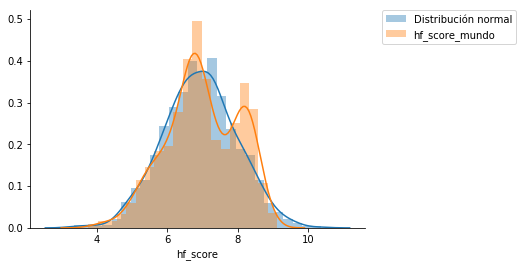

In [51]:
from scipy import stats

# Definimos la variable para el dataset que vamos a utilizar
dataset_hf_score_mundo = dataset['hf_score'].dropna()

# Estimamos los parámetros muestrales (la media y desviación estándar)
loc, scale = stats.norm.fit(dataset_hf_score_mundo)

# Creamos una distribución normal
norm_dist = stats.norm(loc, scale)

# Generamos una muestra
sample = norm_dist.rvs(1000)

# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(dataset_hf_score_mundo, label='hf_score_mundo')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Ahora podemos armar el gráfico QQ. Usamos dos muestras del mismo tamaño, y calculamos los cuartiles.

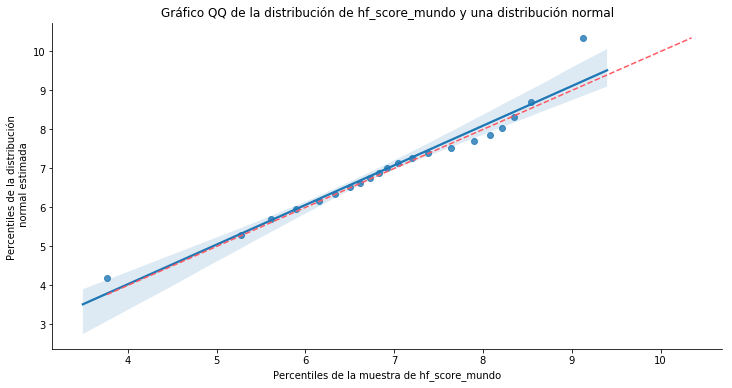

In [52]:
# Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
percs = numpy.linspace(0,100,21)

qn_sample = numpy.percentile(dataset_hf_score_mundo, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset_hf_score_mundo)), percs)

plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)

plt.xlabel('Percentiles de la muestra de hf_score_mundo')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de hf_score_mundo y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color="#FF5964", ls="--")

seaborn.despine()

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
